In [13]:
# Importing libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


In [14]:
# Upload files manually in Google Colab
from google.colab import files
uploaded = files.upload()


Saving output.csv to output (1).csv


In [15]:
# Listing all uploaded files to verify
import os

for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/output (1).csv
/content/output.csv
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/.last_opt_in_prompt.yaml
/content/.config/config_sentinel
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
/content/.config/default_configs.db
/content/.config/configurations/config_default
/content/.config/logs/2024.10.30/13.22.34.572815.log
/content/.config/logs/2024.10.30/13.22.00.451914.log
/content/.config/logs/2024.10.30/13.22.48.134201.log
/content/.config/logs/2024.10.30/13.22.21.465875.log
/content/.config/logs/2024.10.30/13.22.33.602762.log
/content/.config/logs/2024.10.30/13.22.47.439642.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv


In [16]:
# Reading the output.csv file
nRowsRead = 1000  # specify 'None' if you want to read the whole file
df1 = pd.read_csv('/content/output.csv', delimiter=',', nrows=nRowsRead)
df1.dataframeName = 'output.csv'

# Displaying the shape and first few rows
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns in {df1.dataframeName}')
df1.head(5)


There are 315 rows and 2 columns in output.csv


,Person No,Predicted Personality
0,1,dependable
1,2,serious
2,3,serious
3,4,serious
4,5,responsible


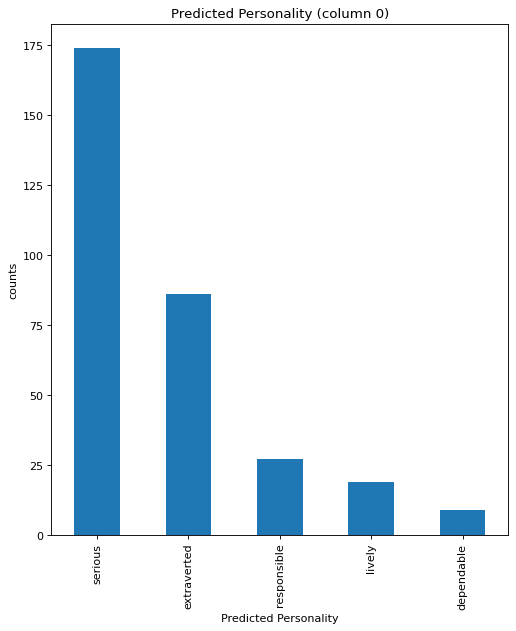

In [17]:
# Define function to plot per-column distribution
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  # for categorical data
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout()
    plt.show()

# Plotting distribution of sampled columns in output.csv
plotPerColumnDistribution(df1, 10, 5)


In [19]:
# Reading the test.csv file
df2 = pd.read_csv('/content/output.csv', delimiter=',', nrows=nRowsRead)
df2.dataframeName = 'test.csv'

# Displaying shape and first few rows
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns in {df2.dataframeName}')
df2.head(5)


There are 315 rows and 2 columns in test.csv


,Person No,Predicted Personality
0,1,dependable
1,2,serious
2,3,serious
3,4,serious
4,5,responsible


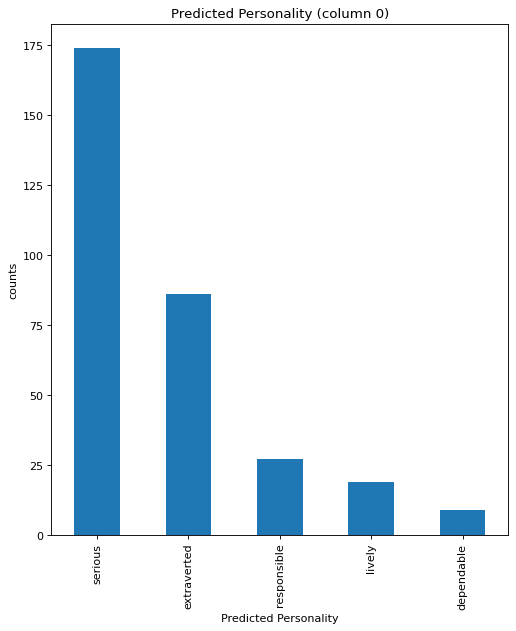

In [20]:
# Plotting distribution of sampled columns in test.csv
plotPerColumnDistribution(df2, 10, 5)


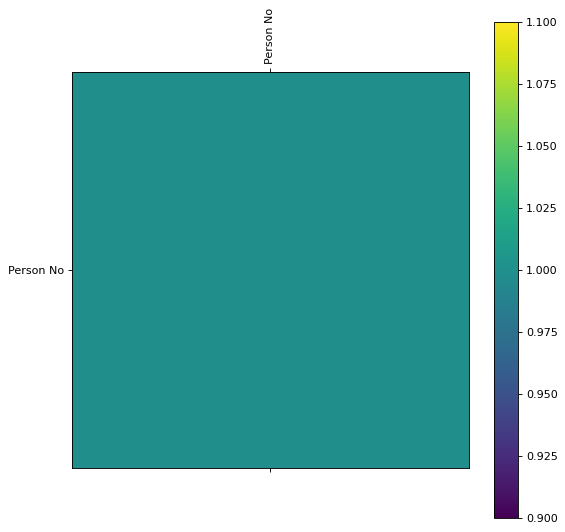

In [22]:
# Define function to plot correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    # Select only numerical columns before calculating correlation
    df_numeric = df.select_dtypes(include=[np.number])
    correlation = df_numeric.corr()

    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    plt.matshow(correlation, fignum=1)
    plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90)
    plt.yticks(range(len(correlation.columns)), correlation.columns)
    plt.colorbar()
    plt.show()

# Plotting correlation matrix for test.csv
plotCorrelationMatrix(df2, 8)


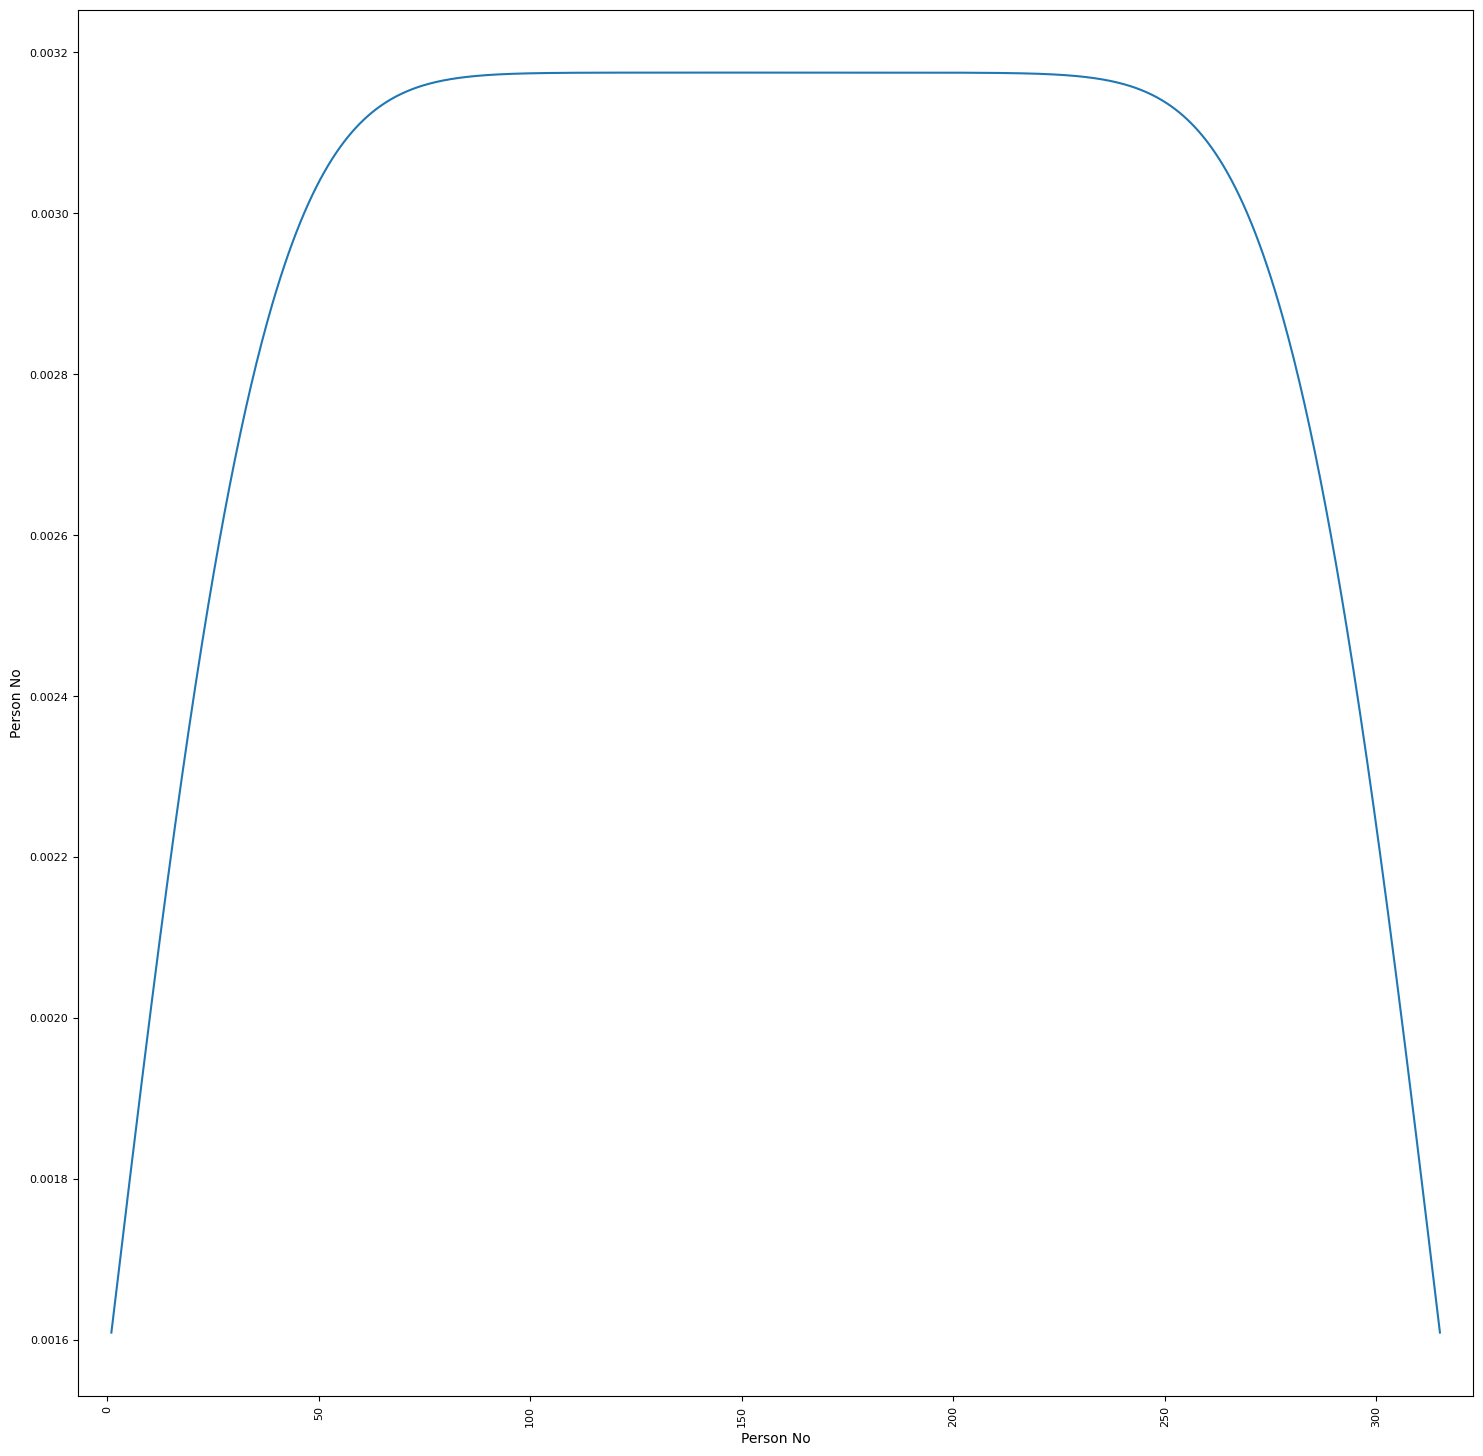

In [23]:
# Define function to plot scatter matrix
from pandas.plotting import scatter_matrix

def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # keep only numerical data
    scatter_matrix(df, alpha=0.75, figsize=(plotSize, plotSize), diagonal='kde')
    plt.xticks(rotation=90)
    plt.show()

# Plotting scatter matrix for test.csv
plotScatterMatrix(df2, 18, 10)


In [25]:
# Reading the train.csv file
df3 = pd.read_csv('/content/output.csv', delimiter=',', nrows=nRowsRead)
df3.dataframeName = 'train.csv'

# Displaying shape and first few rows
nRow, nCol = df3.shape
print(f'There are {nRow} rows and {nCol} columns in {df3.dataframeName}')
df3.head(5)


There are 315 rows and 2 columns in train.csv


,Person No,Predicted Personality
0,1,dependable
1,2,serious
2,3,serious
3,4,serious
4,5,responsible


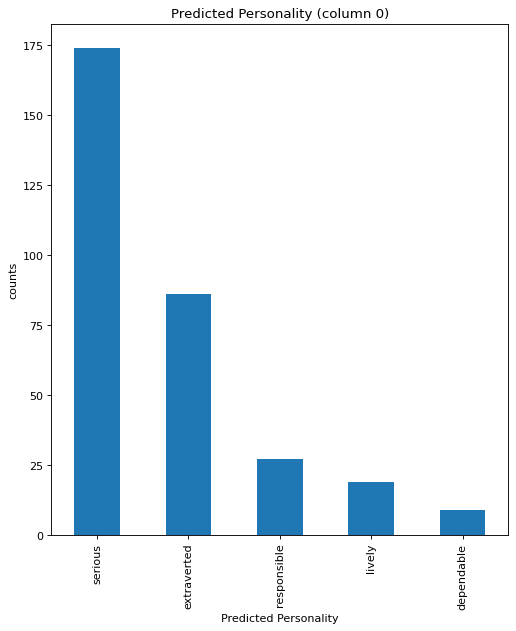

In [26]:
# Plotting distribution of sampled columns in train.csv
plotPerColumnDistribution(df3, 10, 5)


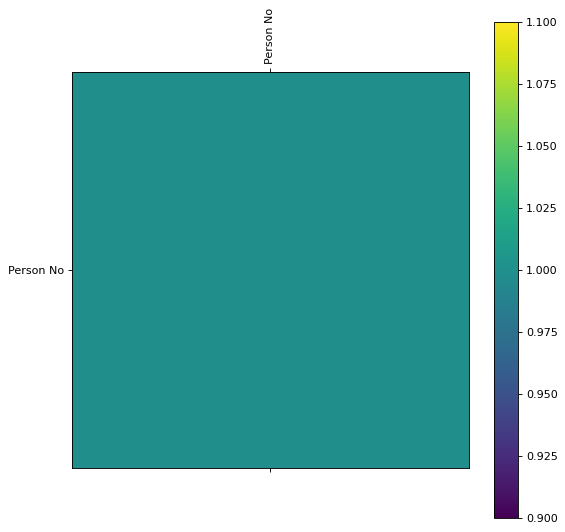

In [27]:
# Plotting correlation matrix for train.csv
plotCorrelationMatrix(df3, 8)


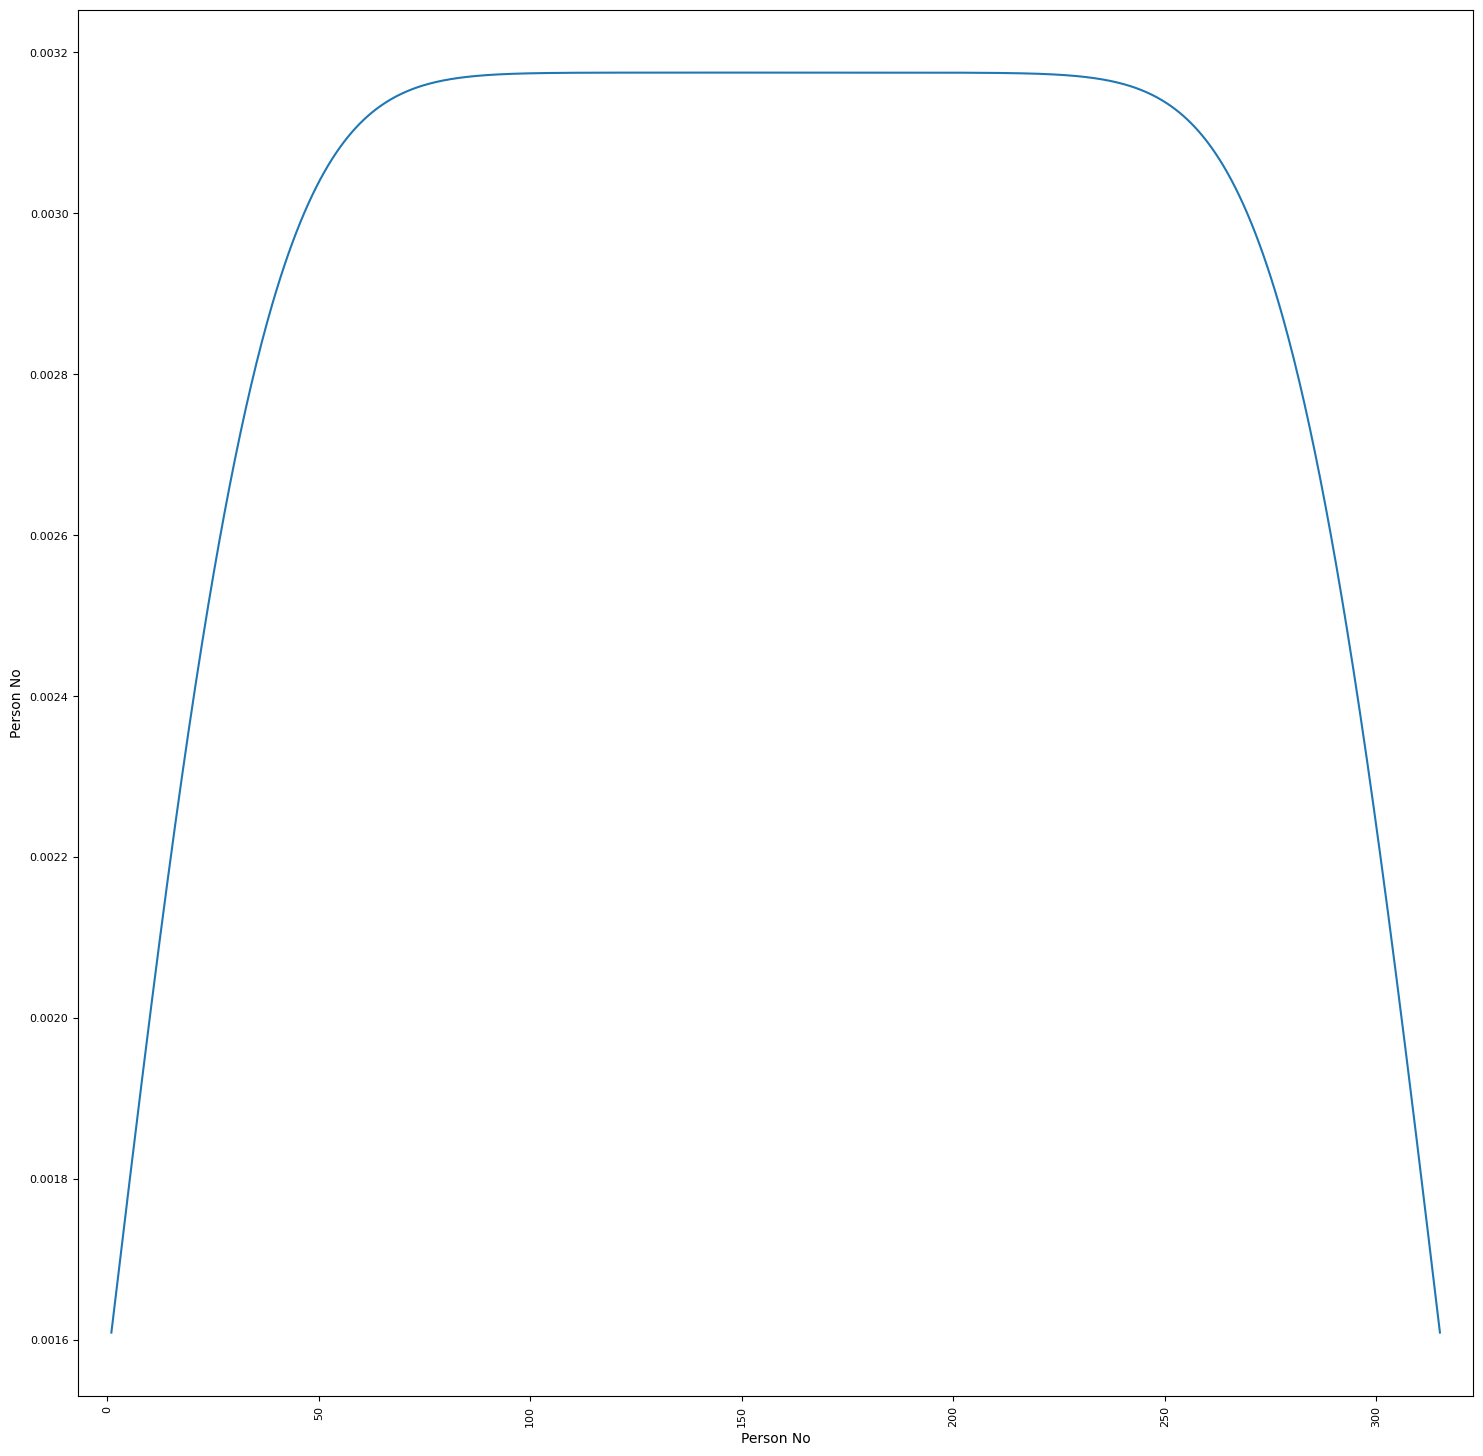

In [28]:
# Plotting scatter matrix for train.csv
plotScatterMatrix(df3, 18, 10)


In [29]:
# Conclusion
print("This concludes the exploratory data analysis!")


This concludes the exploratory data analysis!
